From the Exploratory Data Analysis, we consider only 5 columns for building the model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
df = pd.read_csv("../Data/daily.csv")

In [3]:
columns = ['season','yr','mnth','temp']

In [4]:
X = df[columns].values
y = df['cnt'].values

Splitting the into training and testing, using sklearn with 80% and 20%.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Model - sklearn model 

In [6]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
regressor.intercept_

-174.2303545262048

In [9]:
regressor.coef_

array([ 471.51529353, 2034.78642329,  -34.88695436, 5501.55236589])

+ __cnt__ = -174.23 + 471.51 __season__ + 2034.78 __yr__ -34.88 __mnth__ + 5501.55 __temp__ 

In [10]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [11]:
pred.head()

,Actual,Predicted
0,5923,4773.841304
1,4592,5122.271120
2,1248,1546.091703
3,1360,1284.766355
4,4075,4176.883300


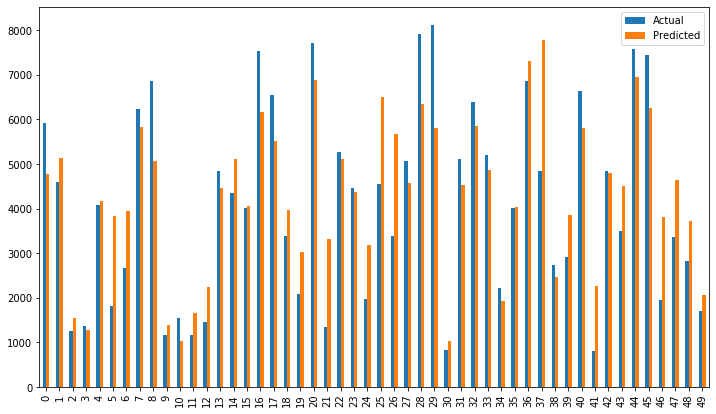

In [12]:
pred.head(50).plot(kind='bar',figsize=(12,7))
plt.show()

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print("r-square score : ", r2_score(y_test, y_pred))       

Mean Absolute Error: 812.4685200638834
r-square score :  0.7327183500040215


From the above linear model we got good r-sqare score.

## Non Linear Model - sklearn

In [14]:
poly = PolynomialFeatures(degree = 3) 
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [15]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
model.intercept_

-287429738653248.2

In [17]:
model.coef_

array([ 2.87429739e+14, -3.79701336e+03, -9.36060955e+02, -1.50236552e+03,
       -1.33282487e+04,  3.89383185e+03,  4.23835387e+03, -1.59901928e+03,
        8.12452744e+03, -9.36060955e+02, -1.25306854e+03,  3.49029128e+03,
       -6.12303674e+01,  7.96493063e+03,  4.93147808e+04, -3.28101038e+03,
       -3.06348009e+03,  2.58798227e+03,  4.81554075e+03,  4.23835387e+03,
        4.91174168e+02,  1.50815979e+03, -5.11571863e+02, -4.87321107e+03,
       -1.10675017e+04, -9.36060955e+02, -1.25306854e+03,  3.49029128e+03,
        1.45377140e+02,  1.40199781e+03, -1.68918993e+04,  3.45497678e+01,
        3.87950277e+02, -2.46315198e+02, -3.23820276e+04])

In [18]:
poly_pred = model.predict(X_poly_test)

In [19]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': poly_pred})

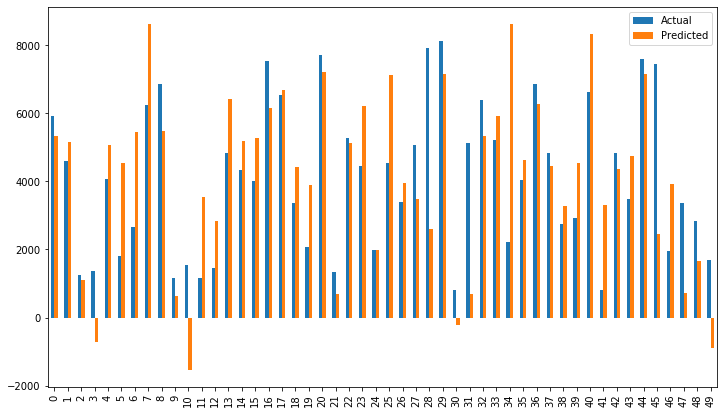

In [20]:
pred.head(50).plot(kind='bar',figsize=(12,7))
plt.show()

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))  
print("r-square score : ", r2_score(y_test, poly_pred) )      

Mean Absolute Error: 1556.1598639455783
r-square score :  -0.11887695292806089


We can observe that using the polynomial model increased the r square score as well as decreased the Mean absolute value, so polynomial model with degree 3 is wokrking better for this data. 

## Linear Model - Statsmodel model (experimentation model)

In [22]:
df = pd.read_csv("../Data/daily.csv")

In [23]:
df.shape

(731, 16)

In [24]:
columns = ['season','yr','mnth','temp','atemp']

In [25]:
train = df.loc[:600,columns + ['cnt']]
test = df.loc[600:,columns + ['cnt']]

In [26]:
lm = smf.ols(formula='cnt ~ season + yr + mnth + temp + atemp', data=train).fit()

In [27]:
print(lm.params)

Intercept    -140.541534
season        263.624535
yr           2122.401094
mnth           38.361963
temp         2822.855254
atemp        2706.451158
dtype: float64


+ __cnt__ = - 140.54 + 263.62 __season__ + 2122.40 __yr__ + 38.36 __mnth__ + 2822.85 __temp__ + 2706.45 __atemp__        

In [28]:
y_pred = lm.predict(test[columns])

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test['cnt'], y_pred))  
print("r-square score : ", r2_score(test['cnt'], y_pred))       

Mean Absolute Error: 1076.7750899540208
r-square score :  0.45925852233603814


This experimental model is performing poorly, so it is not considered for final model.